In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../PooledUpdate/data/produced/03_derived.csv', sep = ';', on_bad_lines='skip')


In [ ]:
##value counts for table one 

In [79]:
df['cT'].value_counts()

#similar for cN and pCR

cT
3.0    5010
2.0     520
4.0     428
1.0     173
Name: count, dtype: int64

In [ ]:
df_filtered['tLength'].std() #.mean()

In [ ]:
#data filtering

In [9]:
df_filtered = df[['trial', 'cN', 'cT', 'tLength', 'pCR', ]]
df_filtered 

,trial,cN,cT,tLength,pCR
0,accord,0.0,2.0,3,True
1,accord,2.0,3.0,"4,5",False
2,accord,1.0,4.0,6,False
3,accord,1.0,3.0,4,False
4,accord,2.0,3.0,4,False
...,...,...,...,...,...
9662,nordic,NaN,NaN,25,NaN
9663,nordic,NaN,NaN,NaN,NaN
9664,nordic,NaN,NaN,28,NaN
9665,nordic,NaN,NaN,NaN,NaN


In [4]:
##data description

In [12]:
df_filtered.describe()

,cN,cT
count,4276.000000,6131.000000
mean,0.631665,2.928560
std,0.599585,0.512281
min,0.000000,1.000000
25%,0.000000,3.000000
50%,1.000000,3.000000
75%,1.000000,3.000000
max,2.000000,4.000000


In [6]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9667 entries, 0 to 9666
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cN       4276 non-null   float64
 1   cT       6131 non-null   float64
 2   tLength  3469 non-null   object 
 3   pCR      8174 non-null   object 
dtypes: float64(2), object(2)
memory usage: 302.2+ KB


In [13]:
df_filtered.isna().sum()

trial         0
cN         5391
cT         3536
tLength    6198
pCR        1493
dtype: int64

In [14]:
df['pCR'].isna().sum()

1493

<Axes: ylabel='Frequency'>

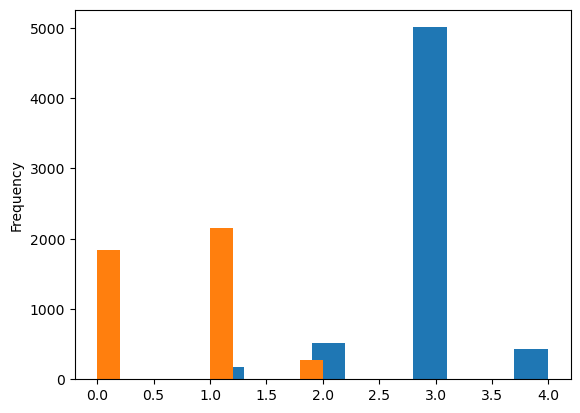

In [16]:
df_filtered['cT'].plot.hist()
df_filtered['cN'].plot.hist()

In [11]:
##data cleaning1 - preparating and synergizing data

In [69]:
df_filtered.loc[:, ('tLength')] = df_filtered.loc[:, ('tLength')].astype(str)
df_filtered.loc[:, ('tLength')] = df_filtered['tLength'].str.replace(',', '.')
df_filtered.loc[:, ('tLength')] = df_filtered.loc[:, ('tLength')].astype(float)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9667 entries, 0 to 9666
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   trial    9667 non-null   object 
 1   cN       4276 non-null   float64
 2   cT       6131 non-null   float64
 3   tLength  3469 non-null   object 
 4   pCR      8174 non-null   object 
dtypes: float64(2), object(3)
memory usage: 377.7+ KB


In [18]:
df_filtered.loc[:, ('pCR')] = df_filtered.loc[:, ('pCR')].astype(float)

In [17]:
##data cleaning2 - Curate (delete all NaN)

In [18]:
#nan_values_cN = df_filtered['cN'].isna()
#nan_values_cT = df_filtered['cT'].isna()
#nan_values_tLength = df_filtered['tLength'].isna()


In [23]:
columns_to_check = ['trial', 'cN', 'cT', 'tLength', 'pCR']

In [24]:
df_cln = df_filtered[~df_filtered[columns_to_check].isna().any(axis=1)]

In [25]:
df_cln

,trial,cN,cT,tLength,pCR
0,accord,0.0,2.0,3.0,1.0
1,accord,2.0,3.0,4.5,0.0
2,accord,1.0,4.0,6.0,0.0
3,accord,1.0,3.0,4.0,0.0
4,accord,2.0,3.0,4.0,0.0
...,...,...,...,...,...
8611,german04,1.0,3.0,15.0,0.0
8612,german04,1.0,3.0,6.0,1.0
8613,german04,1.0,3.0,10.0,0.0
8616,german04,2.0,3.0,10.0,0.0


In [ ]:
##value counts for table two 

In [ ]:
df_cln

In [21]:
##use case 1/test: patient with range 2 cm tLength, similar cN/cT --> calculate %pCR for this group

In [26]:
#baseline pt
df_cln.loc[1]

trial      accord
cN            2.0
cT            3.0
tLength       4.5
pCR           0.0
Name: 1, dtype: object

In [81]:
target_tLength = 4.5 
tolerance = 1.0 
excluded_index = 2

filtered_dfcln = []

for index, row in df_cln.iterrows():
    if index != excluded_index:
        if (abs(row['tLength'] - target_tLength) <= tolerance) and (row['cN'] == 2) and (row['trial'] == 'accord') and (row['cT'] == 3):
            filtered_dfcln.append(row)
filtered_dfcln = pd.DataFrame(filtered_dfcln)
filtered_dfcln

,trial,cN,cT,tLength,pCR,pred_pCR,diff_pCR,pred_pCR.5,diff_pCR.5,pred_res,diff_res
1,accord,2.0,3.0,4.5,0.0,0.213592,0.213592,0.223529,0.223529,0.111111,0.111111
4,accord,2.0,3.0,4.0,0.0,0.238938,0.238938,0.233333,0.233333,0.103448,0.103448
72,accord,2.0,3.0,4.3,0.0,0.239583,0.239583,0.220000,0.220000,0.120000,0.120000
77,accord,2.0,3.0,5.0,0.0,0.203390,0.203390,0.189655,0.189655,0.074074,0.074074
94,accord,2.0,3.0,5.0,0.0,0.203390,0.203390,0.189655,0.189655,0.074074,0.074074
147,accord,2.0,3.0,5.0,0.0,0.203390,0.203390,0.189655,0.189655,0.074074,0.074074
148,accord,2.0,3.0,4.0,0.0,0.238938,0.238938,0.233333,0.233333,0.103448,0.103448
191,accord,2.0,3.0,4.4,0.0,0.231579,0.231579,0.220000,0.220000,0.120000,0.120000
197,accord,2.0,3.0,4.0,0.0,0.238938,0.238938,0.233333,0.233333,0.103448,0.103448
209,accord,2.0,3.0,3.5,0.0,0.234568,0.234568,0.271186,0.271186,0.136364,0.136364


In [ ]:
##Table two 

In [99]:
df_cln['tLength'].std()

2.146232683995853

In [24]:
#automation1

In [29]:
final = dict()
pCR = dict()

for i in df_cln.index:
    
    patient = i

    tolerance = 1.0 

    filtered_dfcln = []
    
    filtered_pCR = []

    for index, row in df_cln.iterrows():
        if index != patient:
            if (abs(row['tLength'] - df_cln['tLength'][patient]) <= tolerance) and (row['cN'] == df_cln['cN'][patient]) and (row['cT'] == df_cln['cT'][patient]):
                filtered_dfcln.append(row)
                filtered_pCR.append(row['pCR'])
                
    filtered_dfcln = pd.DataFrame(filtered_dfcln)
    final[i] = filtered_dfcln
    
    if len(filtered_pCR) != 0:
        pCR[i] = sum(filtered_pCR) / len(filtered_pCR)
    else:
        pCR[i] = 0
    

In [30]:
df_cln['pred_pCR'] = np.nan
df_cln['diff_pCR'] = np.nan

for i in df_cln.index:
    df_cln.loc[i, 'pred_pCR'] = pCR[i]
    df_cln.loc[i, 'diff_pCR'] = abs(df_cln.loc[i, 'pCR'] - pCR[i])

/tmp/ipykernel_117/4116732336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['pred_pCR'] = np.nan
/tmp/ipykernel_117/4116732336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['diff_pCR'] = np.nan


In [31]:
df_cln

,trial,cN,cT,tLength,pCR,pred_pCR,diff_pCR
0,accord,0.0,2.0,3.0,1.0,0.529412,0.470588
1,accord,2.0,3.0,4.5,0.0,0.213592,0.213592
2,accord,1.0,4.0,6.0,0.0,0.076923,0.076923
3,accord,1.0,3.0,4.0,0.0,0.167300,0.167300
4,accord,2.0,3.0,4.0,0.0,0.238938,0.238938
...,...,...,...,...,...,...,...
8611,german04,1.0,3.0,15.0,0.0,0.250000,0.250000
8612,german04,1.0,3.0,6.0,1.0,0.140684,0.859316
8613,german04,1.0,3.0,10.0,0.0,0.061224,0.061224
8616,german04,2.0,3.0,10.0,0.0,0.181818,0.181818


In [28]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2700 entries, 0 to 8617
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cN        2700 non-null   float64
 1   cT        2700 non-null   float64
 2   tLength   2700 non-null   object 
 3   pCR       2700 non-null   object 
 4   pred_pCR  2700 non-null   float64
 5   diff_pCR  2700 non-null   float64
dtypes: float64(4), object(2)
memory usage: 212.2+ KB


In [ ]:
##automation2

In [32]:
final2 = dict()
pCR2 = dict()

for i in df_cln.index:
    
    patient = i

    tolerance = 0.5 

    filtered_dfcln2 = []
    
    filtered_pCR2 = []

    for index, row in df_cln.iterrows():
        if index != patient:
            if (abs(row['tLength'] - df_cln['tLength'][patient]) <= tolerance) and (row['cN'] == df_cln['cN'][patient]) and (row['cT'] == df_cln['cT'][patient]):
                filtered_dfcln2.append(row)
                filtered_pCR2.append(row['pCR'])
                
    filtered_dfcln2 = pd.DataFrame(filtered_dfcln2)
    final2[i] = filtered_dfcln2
    
    if len(filtered_pCR2) != 0:
        pCR2[i] = sum(filtered_pCR2) / len(filtered_pCR2)
    else:
        pCR2[i] = 0

In [33]:
df_cln['pred_pCR.5'] = np.nan
df_cln['diff_pCR.5'] = np.nan

for i in df_cln.index:
    df_cln.loc[i, 'pred_pCR.5'] = pCR2[i]
    df_cln.loc[i, 'diff_pCR.5'] = abs(df_cln.loc[i, 'pCR'] - pCR2[i])

/tmp/ipykernel_117/477008629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['pred_pCR.5'] = np.nan
/tmp/ipykernel_117/477008629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['diff_pCR.5'] = np.nan


In [96]:
df_cln

,cN,cT,tLength,pCR,pred_pCR,diff_pCR,pred_pCR.5,diff_pCR.5
0,0.0,2.0,3.0,1.0,0.529412,0.470588,0.400000,0.600000
1,2.0,3.0,4.5,0.0,0.213592,0.213592,0.223529,0.223529
2,1.0,4.0,6.0,0.0,0.076923,0.076923,0.125000,0.125000
3,1.0,3.0,4.0,0.0,0.167300,0.167300,0.166205,0.166205
4,2.0,3.0,4.0,0.0,0.238938,0.238938,0.233333,0.233333
...,...,...,...,...,...,...,...,...
8611,1.0,3.0,15.0,0.0,0.250000,0.250000,0.000000,0.000000
8612,1.0,3.0,6.0,1.0,0.140684,0.859316,0.157609,0.842391
8613,1.0,3.0,10.0,0.0,0.061224,0.061224,0.035714,0.035714
8616,2.0,3.0,10.0,0.0,0.181818,0.181818,0.000000,0.000000


In [ ]:
##automation3 - per study with tolerance 1

In [34]:
final3 = dict()
pCR3 = dict()

for i in df_cln.index:
    
    patient = i

    tolerance = 1 

    filtered_dfcln3 = []
    
    filtered_pCR3 = []

    for index, row in df_cln.iterrows():
        if index != patient:
            if (abs(row['tLength'] - df_cln['tLength'][patient]) <= tolerance) and (row['trial'] == df_cln['trial'][patient]) and (row['cN'] == df_cln['cN'][patient]) and (row['cT'] == df_cln['cT'][patient]):
                filtered_dfcln3.append(row)
                filtered_pCR3.append(row['pCR'])
                
    filtered_dfcln2 = pd.DataFrame(filtered_dfcln2)
    final2[i] = filtered_dfcln2
    
    if len(filtered_pCR3) != 0:
        pCR3[i] = sum(filtered_pCR3) / len(filtered_pCR3)
    else:
        pCR3[i] = 0

In [85]:
df_cln['pred_res'] = np.nan
df_cln['diff_res'] = np.nan

for i in df_cln.index:
    df_cln.loc[i, 'pred_res'] = pCR3[i]
    df_cln.loc[i, 'diff_res'] = abs(df_cln.loc[i, 'pCR'] - pCR3[i])

/tmp/ipykernel_117/154935935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['pred_res'] = np.nan
/tmp/ipykernel_117/154935935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['diff_res'] = np.nan


In [86]:
df_cln

,trial,cN,cT,tLength,pCR,pred_pCR,diff_pCR,pred_pCR.5,diff_pCR.5,pred_res,diff_res,pred_res.5,diff_res.5
0,accord,0.0,2.0,3.0,1.0,0.529412,0.470588,0.400000,0.600000,0.583333,0.416667,NaN,NaN
1,accord,2.0,3.0,4.5,0.0,0.213592,0.213592,0.223529,0.223529,0.111111,0.111111,NaN,NaN
2,accord,1.0,4.0,6.0,0.0,0.076923,0.076923,0.125000,0.125000,0.166667,0.166667,NaN,NaN
3,accord,1.0,3.0,4.0,0.0,0.167300,0.167300,0.166205,0.166205,0.174863,0.174863,NaN,NaN
4,accord,2.0,3.0,4.0,0.0,0.238938,0.238938,0.233333,0.233333,0.103448,0.103448,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,german04,1.0,3.0,15.0,0.0,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
8612,german04,1.0,3.0,6.0,1.0,0.140684,0.859316,0.157609,0.842391,0.164502,0.835498,NaN,NaN
8613,german04,1.0,3.0,10.0,0.0,0.061224,0.061224,0.035714,0.035714,0.076923,0.076923,NaN,NaN
8616,german04,2.0,3.0,10.0,0.0,0.181818,0.181818,0.000000,0.000000,0.200000,0.200000,NaN,NaN


In [ ]:
##automation 4 / per study with tolerance 0.5

In [82]:
final4 = dict()
pCR4 = dict()

for i in df_cln.index:
    
    patient = i

    tolerance = 0.5 

    filtered_dfcln4 = []
    
    filtered_pCR4 = []

    for index, row in df_cln.iterrows():
        if index != patient:
            if (abs(row['tLength'] - df_cln['tLength'][patient]) <= tolerance) and (row['trial'] == df_cln['trial'][patient]) and (row['cN'] == df_cln['cN'][patient]) and (row['cT'] == df_cln['cT'][patient]):
                filtered_dfcln4.append(row)
                filtered_pCR4.append(row['pCR'])
                
    filtered_dfcln4 = pd.DataFrame(filtered_dfcln4)
    final4[i] = filtered_dfcln4
    
    if len(filtered_pCR4) != 0:
        pCR4[i] = sum(filtered_pCR4) / len(filtered_pCR4)
    else:
        pCR4[i] = 0

In [87]:
df_cln['pred_res.5'] = np.nan
df_cln['diff_res.5'] = np.nan

for i in df_cln.index:
    df_cln.loc[i, 'pred_res.5'] = pCR4[i]
    df_cln.loc[i, 'diff_res.5'] = abs(df_cln.loc[i, 'pCR'] - pCR4[i])

/tmp/ipykernel_117/2792685134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['pred_res.5'] = np.nan
/tmp/ipykernel_117/2792685134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['diff_res.5'] = np.nan


In [88]:
df_cln

,trial,cN,cT,tLength,pCR,pred_pCR,diff_pCR,pred_pCR.5,diff_pCR.5,pred_res,diff_res,pred_res.5,diff_res.5
0,accord,0.0,2.0,3.0,1.0,0.529412,0.470588,0.400000,0.600000,0.583333,0.416667,0.500000,0.500000
1,accord,2.0,3.0,4.5,0.0,0.213592,0.213592,0.223529,0.223529,0.111111,0.111111,0.090909,0.090909
2,accord,1.0,4.0,6.0,0.0,0.076923,0.076923,0.125000,0.125000,0.166667,0.166667,0.500000,0.500000
3,accord,1.0,3.0,4.0,0.0,0.167300,0.167300,0.166205,0.166205,0.174863,0.174863,0.200000,0.200000
4,accord,2.0,3.0,4.0,0.0,0.238938,0.238938,0.233333,0.233333,0.103448,0.103448,0.166667,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,german04,1.0,3.0,15.0,0.0,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8612,german04,1.0,3.0,6.0,1.0,0.140684,0.859316,0.157609,0.842391,0.164502,0.835498,0.204301,0.795699
8613,german04,1.0,3.0,10.0,0.0,0.061224,0.061224,0.035714,0.035714,0.076923,0.076923,0.062500,0.062500
8616,german04,2.0,3.0,10.0,0.0,0.181818,0.181818,0.000000,0.000000,0.200000,0.200000,0.000000,0.000000


In [ ]:
##visualisation and evaluation

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_curve, roc_auc_score

/opt/conda/lib/python3.10/site-packages/sklearn/calibration.py:1000: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


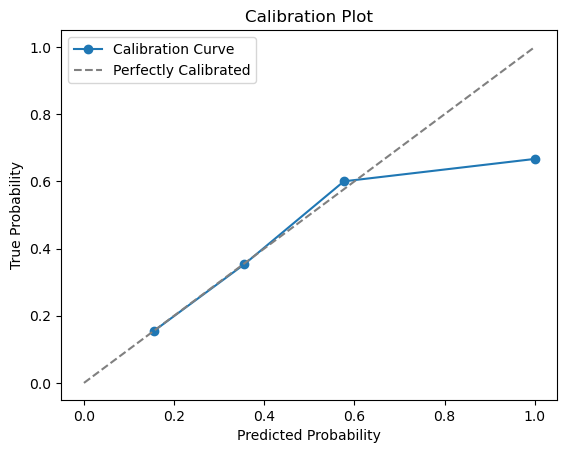

In [41]:
#SCE1


y_true = df_cln['pCR'].astype(int)
y_pred = df_cln['pred_pCR']

prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=4, normalize=True)

plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')

plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Plot')
plt.legend()
plt.show()

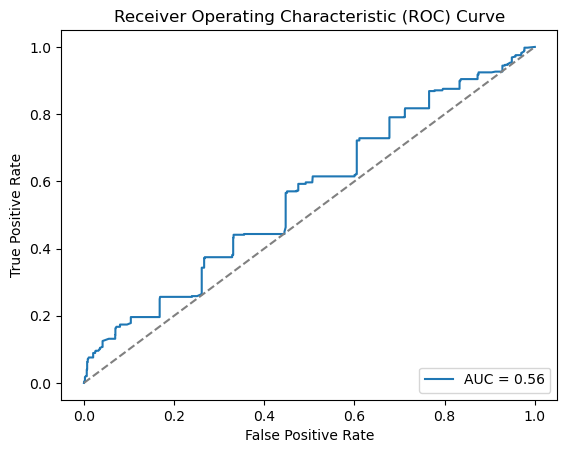

In [42]:
y_true = df_cln['pCR'].astype(int)
y_scores = df_cln['pred_pCR']

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
auc = roc_auc_score(y_true, y_scores)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

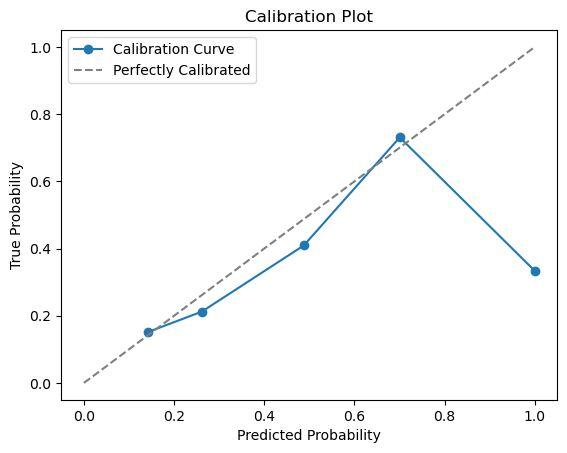

In [45]:
#SCE2
y_true = df_cln['pCR'].astype(int)
y_pred = df_cln['pred_pCR.5']

prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=5, )

plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')

plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Plot')
plt.legend()
plt.show()

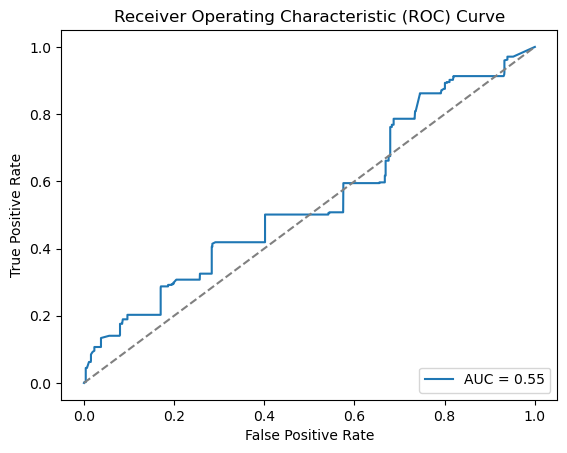

In [47]:
y_true = df_cln['pCR'].astype(int)
y_scores = df_cln['pred_pCR.5']

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
auc = roc_auc_score(y_true, y_scores)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#SCE3

In [48]:
!pip install rdflib
!pip install docker
!pip install SPARQLWrapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 8.6 MB/s eta 0:00:00


In [49]:
from mcl.app.ModelEngine import ModelEngine

mEngine = ModelEngine("https://fairmodels.org/models/radiotherapy/stiphout_2011.ttl", libraryLocation="mcl/app")
modelExecutor = mEngine.getModelExecutor()

In [89]:
output_data = modelExecutor.executeModelOnDataFrame(df_cln)
output_data

,trial,cN,cT,tLength,pCR,pred_pCR,diff_pCR,pred_pCR.5,diff_pCR.5,pred_res,diff_res,pred_res.5,diff_res.5,probability
0,accord,0.0,2.0,3.0,1.0,0.529412,0.470588,0.400000,0.600000,0.583333,0.416667,0.500000,0.500000,0.268352
1,accord,2.0,3.0,4.5,0.0,0.213592,0.213592,0.223529,0.223529,0.111111,0.111111,0.090909,0.090909,0.210071
2,accord,1.0,4.0,6.0,0.0,0.076923,0.076923,0.125000,0.125000,0.166667,0.166667,0.500000,0.500000,0.187551
3,accord,1.0,3.0,4.0,0.0,0.167300,0.167300,0.166205,0.166205,0.174863,0.174863,0.200000,0.200000,0.227585
4,accord,2.0,3.0,4.0,0.0,0.238938,0.238938,0.233333,0.233333,0.103448,0.103448,0.166667,0.166667,0.21721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,german04,1.0,3.0,15.0,0.0,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103679
8612,german04,1.0,3.0,6.0,1.0,0.140684,0.859316,0.157609,0.842391,0.164502,0.835498,0.204301,0.795699,0.199089
8613,german04,1.0,3.0,10.0,0.0,0.061224,0.061224,0.035714,0.035714,0.076923,0.076923,0.062500,0.062500,0.150332
8616,german04,2.0,3.0,10.0,0.0,0.181818,0.181818,0.000000,0.000000,0.200000,0.200000,0.000000,0.000000,0.142828


In [100]:
output_data2 = modelExecutor.executeModelOnDataFrame(df_cln)
output_data2

,trial,cN,cT,tLength,pCR,pred_pCR,diff_pCR,pred_pCR.5,diff_pCR.5,pred_res,diff_res,pred_res.5,diff_res.5,probability
0,accord,0.0,2.0,3.0,1.0,0.529412,0.470588,0.400000,0.600000,0.583333,0.416667,0.500000,0.500000,0.268352
1,accord,2.0,3.0,4.5,0.0,0.213592,0.213592,0.223529,0.223529,0.111111,0.111111,0.090909,0.090909,0.210071
2,accord,1.0,4.0,6.0,0.0,0.076923,0.076923,0.125000,0.125000,0.166667,0.166667,0.500000,0.500000,0.187551
3,accord,1.0,3.0,4.0,0.0,0.167300,0.167300,0.166205,0.166205,0.174863,0.174863,0.200000,0.200000,0.227585
4,accord,2.0,3.0,4.0,0.0,0.238938,0.238938,0.233333,0.233333,0.103448,0.103448,0.166667,0.166667,0.21721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,german04,1.0,3.0,15.0,0.0,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103679
8612,german04,1.0,3.0,6.0,1.0,0.140684,0.859316,0.157609,0.842391,0.164502,0.835498,0.204301,0.795699,0.199089
8613,german04,1.0,3.0,10.0,0.0,0.061224,0.061224,0.035714,0.035714,0.076923,0.076923,0.062500,0.062500,0.150332
8616,german04,2.0,3.0,10.0,0.0,0.181818,0.181818,0.000000,0.000000,0.200000,0.200000,0.000000,0.000000,0.142828


<Axes: ylabel='Frequency'>

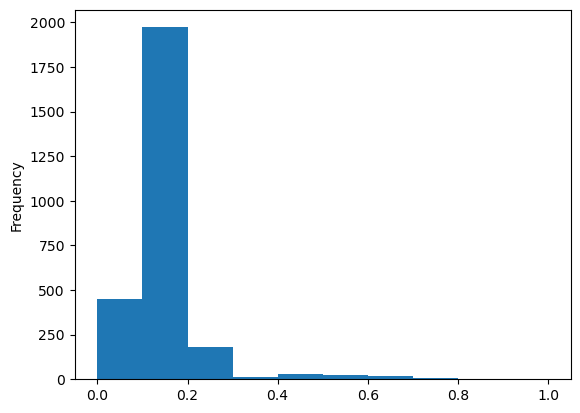

In [115]:
output_data2['pred_pCR.5'].plot.hist()

In [199]:
#odt = output_data.sort_values('diff_pCR.5', ascending=True)
#pd.set_option('display.max_rows', 2700)  
#pd.set_option('display.max_columns', 100)  
#subset = odt[['pCR', 'diff_pCR.5' , 'pred_pCR.5']].head(2700)
#print(subset)

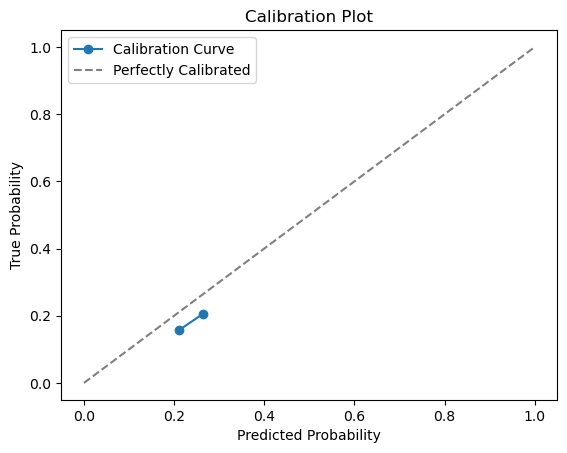

In [90]:
y_true = output_data['pCR'].astype(int)
y_pred = output_data['probability'].astype(float)

prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=4, )

plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')

plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Plot')
plt.legend()
plt.show()

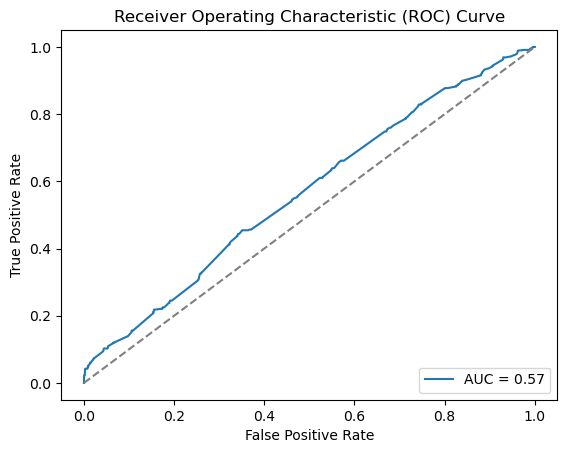

In [91]:
#ROCModel
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_true = output_data['pCR'].astype(int)
y_scores = output_data['probability']

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
auc = roc_auc_score(y_true, y_scores)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [104]:
##CI in loop gooien

output_data_CI = np.random.normal(loc=0, scale=1, size=100)

sample_mean = np.mean(output_data)
sample_std = np.std(output_data)

confidence_level = 0.95

z_score = np.abs(np.random.standard_normal())
margin_of_error = z_score * (sample_std / np.sqrt(len(output_data)))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Confidence Interval:", confidence_interval)

Confidence Interval: (cN             1.063666
cT               1.0727
tLength        1.009504
pCR            1.071403
pred_pCR       1.081908
diff_pCR       1.075643
pred_pCR.5     1.081159
diff_pCR.5     1.075404
probability    1.083292
dtype: object, cN             1.105132
cT             1.096098
tLength        1.159294
pCR            1.097395
pred_pCR        1.08689
diff_pCR       1.093155
pred_pCR.5     1.087639
diff_pCR.5     1.093394
probability    1.085506
dtype: object)


In [ ]:
##Filter per research

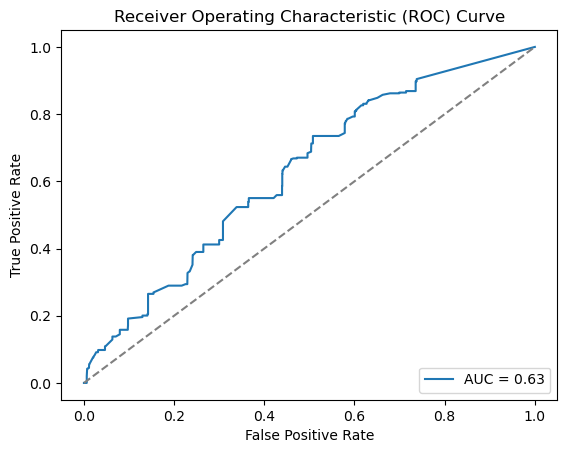

In [117]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

##3ROC/AUC curves opstellen
# Generate some example data
y_true = output_data['pCR'].astype(int)
y_scores = df_cln['pred_res.5']

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
auc = roc_auc_score(y_true, y_scores)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
